In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# C:/Windows/Fonts/H2GSRB.TTF
import matplotlib as mp
import matplotlib.font_manager as fm
import os
# 한글폰트 - matplot lib 한글을 지원안하므로 자신의 컴에 있는 한글 폰트는 셋팅
location = 'C:/Windows/Fonts/H2GSRB.TTF'
font_name = fm.FontProperties(fname=location).get_name()
mp.rc('font',family=font_name)

<AxesSubplot:title={'center':'한글'}>

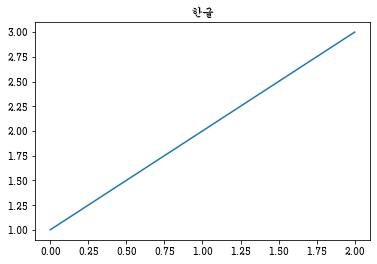

In [2]:
pd.Series([1,2,3]).plot(title='한글')

In [3]:
# 데이터 로드
df = pd.read_csv('전국도시공원정보표준데이터.csv',encoding='cp949')
df.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명
0,47190-00127,백현체육공원,체육공원,NaN,경상북도 구미시 산동면 백현리 79,36.186429,128.478491,90967.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-09,5080000,경상북도 구미시
1,47190-00128,둘모아공원,어린이공원,NaN,경상북도 구미시 봉곡동 584-2,36.148431,128.316594,4279.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-09,5080000,경상북도 구미시
2,47190-00129,다붓소공원,소공원,NaN,경상북도 구미시 봉곡동 765 일원,36.155883,128.311526,805.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-09,5080000,경상북도 구미시
3,47190-00130,다붓1공원,어린이공원,NaN,경상북도 구미시 봉곡동 457-1,36.156392,128.314372,1585.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-09,5080000,경상북도 구미시
4,47190-00131,다붓2공원,어린이공원,NaN,경상북도 구미시 봉곡동 767,36.154808,128.314372,1637.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-09,5080000,경상북도 구미시


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18400 entries, 0 to 18399
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   관리번호          18400 non-null  object 
 1   공원명           18400 non-null  object 
 2   공원구분          18400 non-null  object 
 3   소재지도로명주소      5357 non-null   object 
 4   소재지지번주소       17916 non-null  object 
 5   위도            18207 non-null  float64
 6   경도            18200 non-null  float64
 7   공원면적          18400 non-null  float64
 8   공원보유시설(운동시설)  4978 non-null   object 
 9   공원보유시설(유희시설)  6574 non-null   object 
 10  공원보유시설(편익시설)  5315 non-null   object 
 11  공원보유시설(교양시설)  899 non-null    object 
 12  공원보유시설(기타시설)  2846 non-null   object 
 13  지정고시일         15997 non-null  object 
 14  관리기관명         17457 non-null  object 
 15  전화번호          17074 non-null  object 
 16  데이터기준일자       18400 non-null  object 
 17  제공기관코드        18400 non-null  object 
 18  제공기관명         18400 non-nu

<AxesSubplot:>

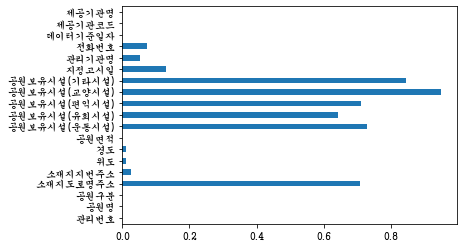

In [5]:
df.isna().mean().plot.barh()

In [6]:
remove_cols = df.columns[ df.isna().mean() > 0.5]
remove_cols = remove_cols[1:]
remove_cols

Index(['공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)'],
      dtype='object')

In [7]:
df2 =  df.drop(columns=remove_cols).copy()
df2.isna().mean()

관리번호        0.000000
공원명         0.000000
공원구분        0.000000
소재지도로명주소    0.708859
소재지지번주소     0.026304
위도          0.010489
경도          0.010870
공원면적        0.000000
지정고시일       0.130598
관리기관명       0.051250
전화번호        0.072065
데이터기준일자     0.000000
제공기관코드      0.000000
제공기관명       0.000000
dtype: float64

In [8]:
(df2['소재지지번주소'].isnull() & df2['소재지도로명주소'].notnull()).sum()

484

In [9]:
df2['소재지지번주소'] = df2['소재지지번주소'].fillna(df2['소재지도로명주소'])

In [10]:
df2.isnull().mean()

관리번호        0.000000
공원명         0.000000
공원구분        0.000000
소재지도로명주소    0.708859
소재지지번주소     0.000000
위도          0.010489
경도          0.010870
공원면적        0.000000
지정고시일       0.130598
관리기관명       0.051250
전화번호        0.072065
데이터기준일자     0.000000
제공기관코드      0.000000
제공기관명       0.000000
dtype: float64

In [11]:
df2.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명
0,47190-00127,백현체육공원,체육공원,NaN,경상북도 구미시 산동면 백현리 79,36.186429,128.478491,90967.0,NaN,NaN,NaN,2022-06-09,5080000,경상북도 구미시
1,47190-00128,둘모아공원,어린이공원,NaN,경상북도 구미시 봉곡동 584-2,36.148431,128.316594,4279.0,NaN,NaN,NaN,2022-06-09,5080000,경상북도 구미시
2,47190-00129,다붓소공원,소공원,NaN,경상북도 구미시 봉곡동 765 일원,36.155883,128.311526,805.0,NaN,NaN,NaN,2022-06-09,5080000,경상북도 구미시
3,47190-00130,다붓1공원,어린이공원,NaN,경상북도 구미시 봉곡동 457-1,36.156392,128.314372,1585.0,NaN,NaN,NaN,2022-06-09,5080000,경상북도 구미시
4,47190-00131,다붓2공원,어린이공원,NaN,경상북도 구미시 봉곡동 767,36.154808,128.314372,1637.0,NaN,NaN,NaN,2022-06-09,5080000,경상북도 구미시


In [12]:
df2['시도'] =  df2['제공기관명'].str.split(expand=True)[0]

In [13]:
df2['시도'].unique()

array(['경상북도', '울산광역시', '서울특별시', '경기도', '인천광역시', '강원도', '경상남도', '전라남도',
       '부산광역시', '대전광역시', '대구광역시', '제주특별자치도', '전라북도', '충청남도', '광주광역시',
       '충청북도', '부산관광공사', '인천시설공단', '울산시설공단', '세종특별자치시', '기장군도시관리공단'],
      dtype=object)

In [14]:
idx =  (df2['시도'] == '부산관광공사' ).values | (df2['시도'] == '기장군도시관리공단').values
print(idx.sum())
df2.loc[idx,'시도'] = '부산광역시'


47


In [15]:
df2['시도'].unique()

array(['경상북도', '울산광역시', '서울특별시', '경기도', '인천광역시', '강원도', '경상남도', '전라남도',
       '부산광역시', '대전광역시', '대구광역시', '제주특별자치도', '전라북도', '충청남도', '광주광역시',
       '충청북도', '인천시설공단', '울산시설공단', '세종특별자치시'], dtype=object)

In [16]:
df2['시도'][ df2['시도'] == '인천시설공단'] = '인천광역시'

C:\Users\user\AppData\Local\Temp\ipykernel_3612\2264058107.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['시도'][ df2['시도'] == '인천시설공단'] = '인천광역시'


In [17]:
df2.loc[df2['시도'] == '울산시설공단','시도'] = '울산광역시'

In [18]:
#람다 함수... 이름없이 사용 익명함수
# 파이썬 내장함수 나 기타 함수의 매개변수로 다른함수를 요구하는 함수들....

In [19]:
# 파이썬 리스트중에서 특정조건을 만족하는 데이터만 추출 filter
# filter(적용할 함수, 파이썬 리스트)
from random  import sample
list1 = sample(range(100),20)
list1

[46, 21, 78, 7, 59, 50, 98, 76, 48, 95, 15, 32, 2, 19, 25, 44, 83, 12, 93, 39]

In [20]:
# def overFind50(x):
#     return x > 50
# overFind50 = lambda x : x > 50

In [21]:
list(filter(lambda x : x > 50, list1))

[78, 59, 98, 76, 95, 83, 93]

In [22]:
list(filter(lambda x : x%2==0 , list1))

[46, 78, 50, 98, 76, 48, 32, 2, 44, 12]

In [23]:
temp = df2['소재지지번주소'].str.split(expand=True)
temp.head()

,0,1,2,3,4,5,6,7,8
0,경상북도,구미시,산동면,백현리,79,None,None,None,None
1,경상북도,구미시,봉곡동,584-2,None,None,None,None,None
2,경상북도,구미시,봉곡동,765,일원,None,None,None,None
3,경상북도,구미시,봉곡동,457-1,None,None,None,None,None
4,경상북도,구미시,봉곡동,767,None,None,None,None,None


In [24]:
df2['구군'] =  temp[1]

In [25]:
df2['시도'].value_counts()

경기도        4137
전라남도       2036
서울특별시      1781
충청남도       1774
경상남도       1114
경상북도       1003
광주광역시       913
울산광역시       815
충청북도        790
부산광역시       673
인천광역시       672
전라북도        671
대구광역시       634
강원도         627
대전광역시       445
제주특별자치도     245
세종특별자치시      70
Name: 시도, dtype: int64

<AxesSubplot:>

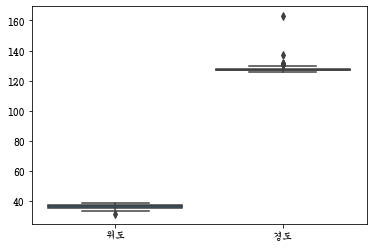

In [26]:
sns.boxplot(data=df2.loc[:,['위도','경도']])

<AxesSubplot:xlabel='경도', ylabel='위도'>

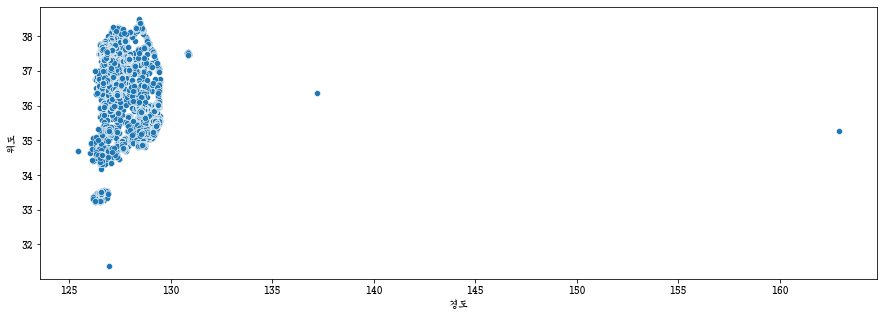

In [27]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df2, x='경도',y='위도')

In [28]:
df2 = df2[((df2['위도'] > 32) &(df2['경도']<135))]

<AxesSubplot:xlabel='경도', ylabel='위도'>

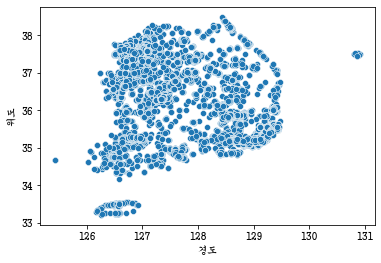

In [29]:
sns.scatterplot(data=df2, x='경도',y='위도')

In [30]:
# 위도 경도의 기술 통계량
df2[['위도','경도']].describe()

,위도,경도
count,18137.000000,18137.000000
mean,36.392435,127.470893
std,1.066415,0.857560
min,33.218571,125.430955
25%,35.303633,126.862005
50%,36.597455,127.101548
75%,37.408172,127.977442
max,38.491555,130.905954


In [31]:
df2.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군
0,47190-00127,백현체육공원,체육공원,NaN,경상북도 구미시 산동면 백현리 79,36.186429,128.478491,90967.0,NaN,NaN,NaN,2022-06-09,5080000,경상북도 구미시,경상북도,구미시
1,47190-00128,둘모아공원,어린이공원,NaN,경상북도 구미시 봉곡동 584-2,36.148431,128.316594,4279.0,NaN,NaN,NaN,2022-06-09,5080000,경상북도 구미시,경상북도,구미시
2,47190-00129,다붓소공원,소공원,NaN,경상북도 구미시 봉곡동 765 일원,36.155883,128.311526,805.0,NaN,NaN,NaN,2022-06-09,5080000,경상북도 구미시,경상북도,구미시
3,47190-00130,다붓1공원,어린이공원,NaN,경상북도 구미시 봉곡동 457-1,36.156392,128.314372,1585.0,NaN,NaN,NaN,2022-06-09,5080000,경상북도 구미시,경상북도,구미시
4,47190-00131,다붓2공원,어린이공원,NaN,경상북도 구미시 봉곡동 767,36.154808,128.314372,1637.0,NaN,NaN,NaN,2022-06-09,5080000,경상북도 구미시,경상북도,구미시


In [32]:
df2 = df2.reset_index(drop=True)
# df2[df2.duplicated()]

In [33]:
df2[df2.duplicated()].index

Int64Index([2098, 5151, 5157, 5158, 5159, 5160, 5161, 5169, 5170, 5171, 5173,
            5174, 5755, 5756, 9463, 9464, 9465, 9467, 9468, 9469, 9471, 9472,
            9486, 9510, 9511, 9512, 9513],
           dtype='int64')

In [34]:
df2.drop(index=df2[df2.duplicated()].index,inplace=True)

In [35]:
df2[df2.duplicated()]

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군


In [36]:
df2.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군
0,47190-00127,백현체육공원,체육공원,NaN,경상북도 구미시 산동면 백현리 79,36.186429,128.478491,90967.0,NaN,NaN,NaN,2022-06-09,5080000,경상북도 구미시,경상북도,구미시
1,47190-00128,둘모아공원,어린이공원,NaN,경상북도 구미시 봉곡동 584-2,36.148431,128.316594,4279.0,NaN,NaN,NaN,2022-06-09,5080000,경상북도 구미시,경상북도,구미시
2,47190-00129,다붓소공원,소공원,NaN,경상북도 구미시 봉곡동 765 일원,36.155883,128.311526,805.0,NaN,NaN,NaN,2022-06-09,5080000,경상북도 구미시,경상북도,구미시
3,47190-00130,다붓1공원,어린이공원,NaN,경상북도 구미시 봉곡동 457-1,36.156392,128.314372,1585.0,NaN,NaN,NaN,2022-06-09,5080000,경상북도 구미시,경상북도,구미시
4,47190-00131,다붓2공원,어린이공원,NaN,경상북도 구미시 봉곡동 767,36.154808,128.314372,1637.0,NaN,NaN,NaN,2022-06-09,5080000,경상북도 구미시,경상북도,구미시


In [37]:
temp = df2['데이터기준일자'].str.split(pat="-", expand=True)
df2['년도'] = temp[0]
df2['월'] = temp[1]
df2['일'] = temp[2]

In [38]:
df2['년도'].unique()

array(['2022', '2021', '2020', '2019', '2018'], dtype=object)

In [39]:
# df2[df2['전화번호'].notnull()]
# 정규표현식

In [40]:
import re

* 파이썬 공식문서 정규표현식 참고하기 : 
    * https://docs.python.org/3.8/library/re.html#re.sub

In [59]:
# re.sub(규칙,패턴,데이터)
re.sub("(\d{3})-(\d{1,2})(\d{2})-(\d{2})(\d{2})", r"\1-\2**-**\5","052-2413-7942")

'052-24**-**42'

In [62]:
index =  df2[df2['전화번호'].notnull()].index
changef = lambda x : re.sub("(\d{3})-(\d{1,2})(\d{2})-(\d{2})(\d{2})", r"\1-\2**-**\5",x)

In [63]:
df2.loc[index,'전화번호'] = df2.loc[index,'전화번호'].apply(changef)

In [64]:
df2.loc[index,'전화번호']

29       052-2**-**42
30       052-2**-**42
31       052-2**-**42
32       052-2**-**42
33       052-2**-**42
             ...     
18105    033-7**-**26
18106    033-7**-**26
18107    033-7**-**26
18108    033-7**-**82
18136    043-6**-**15
Name: 전화번호, Length: 16807, dtype: object

<AxesSubplot:xlabel='년도', ylabel='count'>

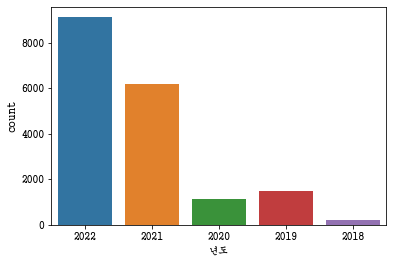

In [66]:
sns.countplot(data=df2,x='년도')

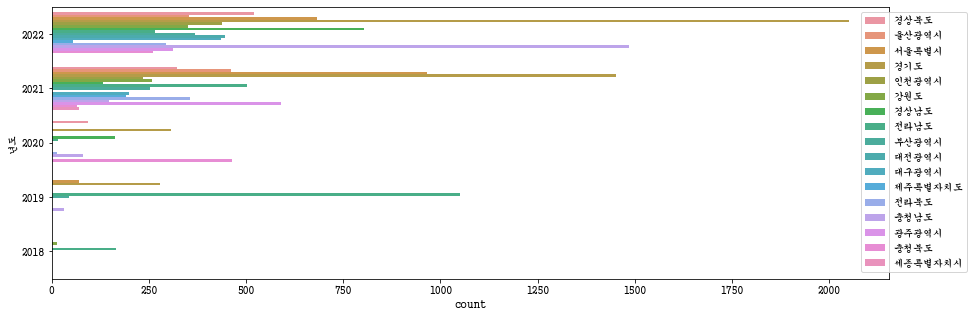

In [84]:
plt.figure(figsize=(15,5))
sns.countplot(data=df2,y='년도',hue='시도')
plt.legend(bbox_to_anchor=(1.1,1),loc = 'upper right')

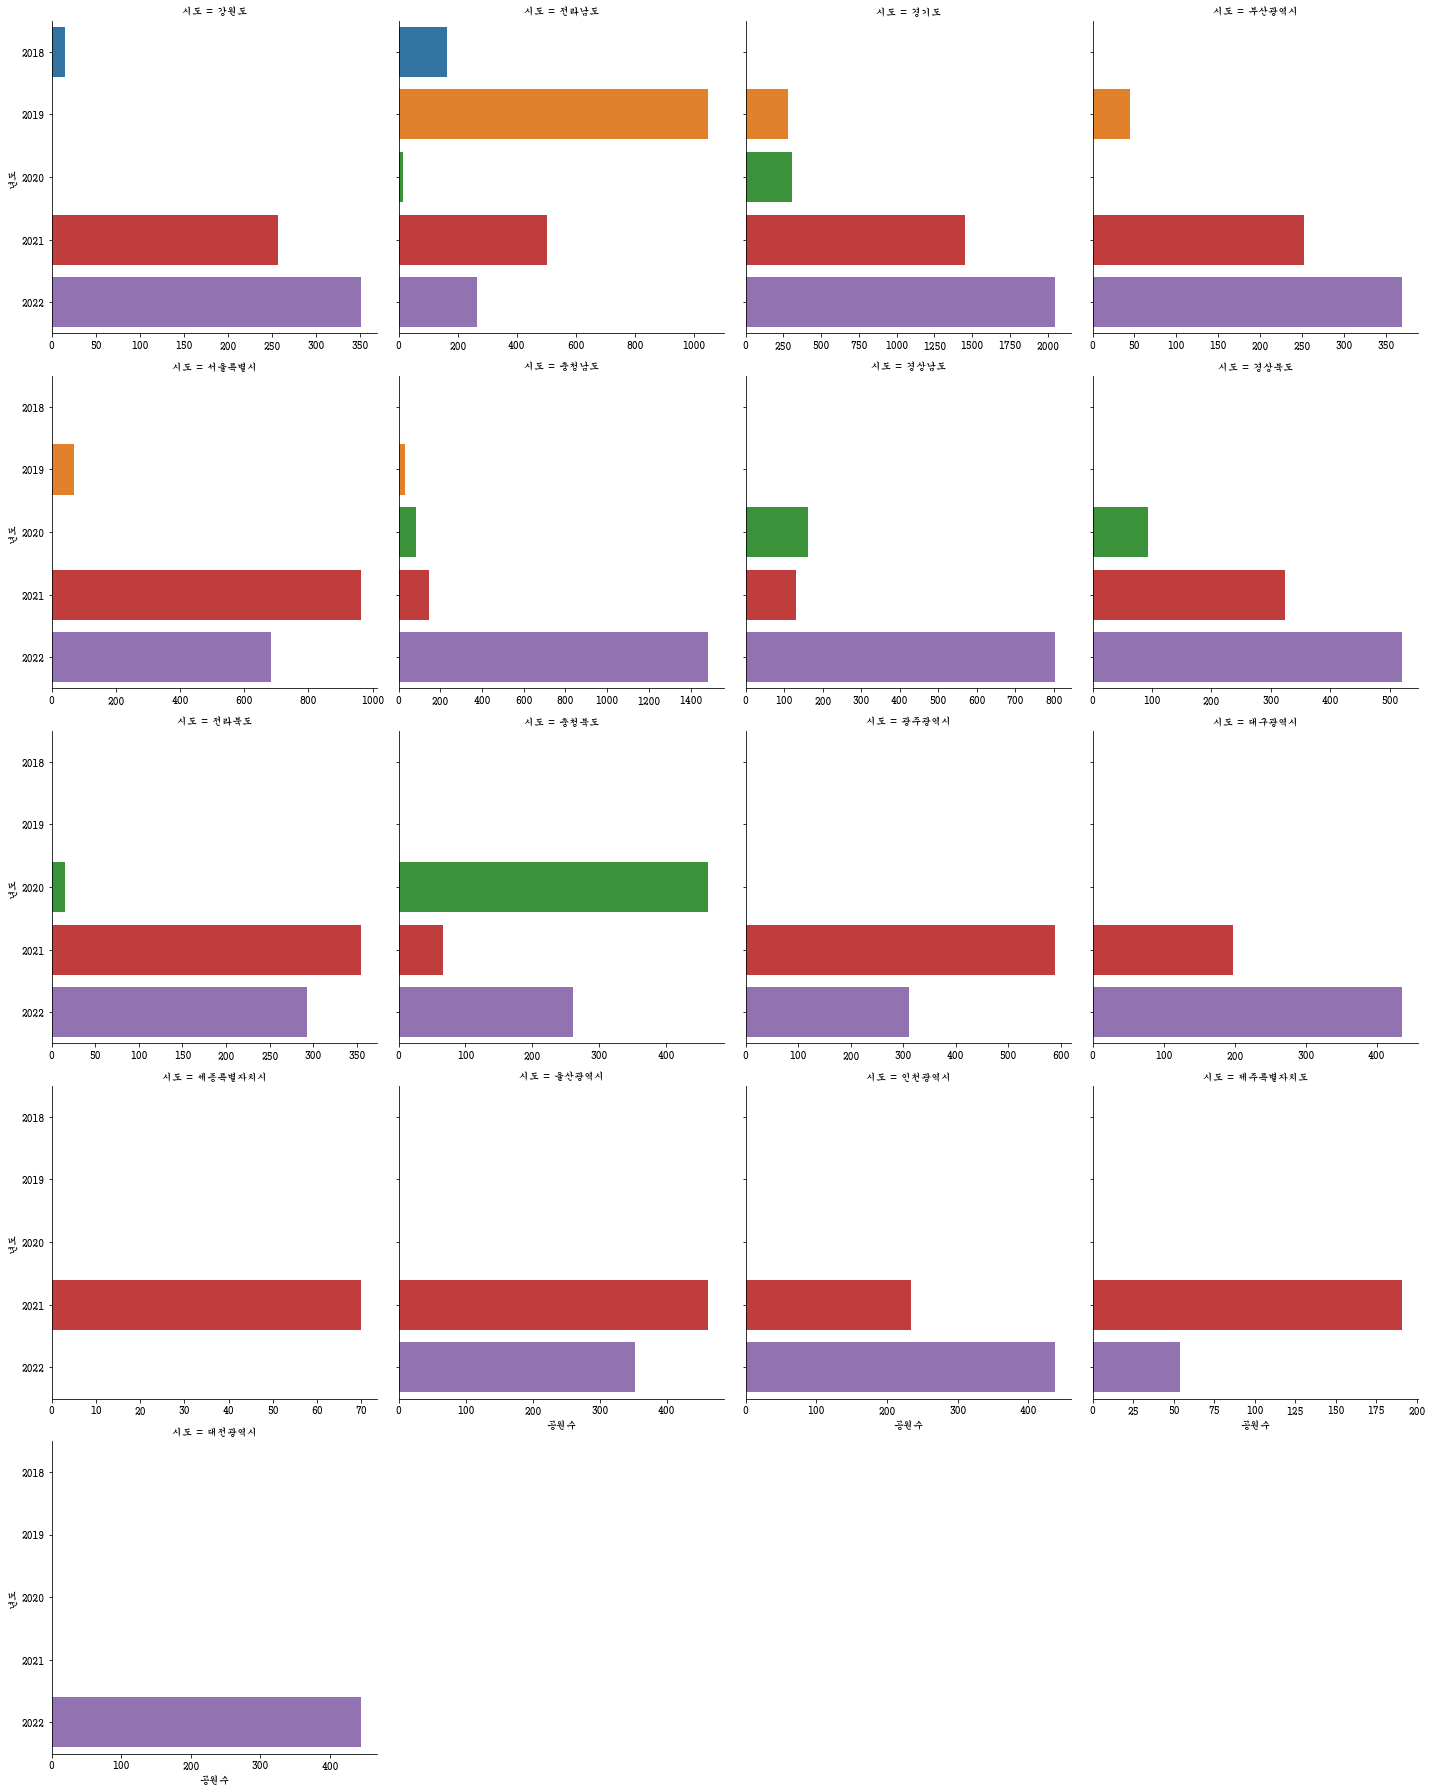

In [96]:
# 연도별 공원의수
temp = df2.groupby(['년도','시도'])['관리번호'].count()
temp = temp.reset_index()
temp.columns = ['년도','시도','공원수']
temp
sns.catplot(data=temp,x='공원수',y ='년도' , col='시도', col_wrap=4, kind='bar',sharex=False)

In [97]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [98]:
import folium

In [115]:
df_gyeonggido= df2[df2['시도'] == '경기도']
df_gyeonggido_youngin = df_gyeonggido[df_gyeonggido['구군'] == '용인시']

In [116]:
df_gyeonggido_youngin.reset_index(drop=True,inplace=True)
lat = df_gyeonggido_youngin['위도'].mean()
lng = df_gyeonggido_youngin['경도'].mean()
m =  folium.Map([lat,lng], zoom_start=12)
for i in range(len(df_gyeonggido_youngin)):
    rowData = df_gyeonggido_youngin.loc[i]
    folium.Marker(
        [rowData['위도'], rowData['경도'] ]
        ,tooltip=rowData['공원명']+'-'+rowData['소재지지번주소']
    ).add_to(m)    
m.save('df_gyeonggido_youngin.html')

In [117]:
df_gyeonggido_youngin.reset_index(drop=True,inplace=True)
lat = df_gyeonggido_youngin['위도'].mean()
lng = df_gyeonggido_youngin['경도'].mean()
m =  folium.Map([lat,lng], zoom_start=12,tiles='stamen toner')
for i in range(len(df_gyeonggido_youngin)):
    rowData = df_gyeonggido_youngin.loc[i]
    folium.CircleMarker(
        [rowData['위도'], rowData['경도'] ]
        ,tooltip=rowData['공원명']+'-'+rowData['소재지지번주소']
    ).add_to(m)    
m.save('df_gyeonggido_youngin_circle.html')

In [118]:
from folium.plugins import MarkerCluster

df_gyeonggido_youngin.reset_index(drop=True,inplace=True)
lat = df_gyeonggido_youngin['위도'].mean()
lng = df_gyeonggido_youngin['경도'].mean()

m =  folium.Map([lat,lng], zoom_start=12,tiles='stamen toner')
mt = MarkerCluster().add_to(m)

for i in range(len(df_gyeonggido_youngin)):
    rowData = df_gyeonggido_youngin.loc[i]
    folium.CircleMarker(
        [rowData['위도'], rowData['경도'] ]
        ,tooltip=rowData['공원명']+'-'+rowData['소재지지번주소']
    ).add_to(mt)    
m.save('df_gyeonggido_youngin_markerCluster.html')

In [124]:
sample = df_gyeonggido_youngin[['위도','경도','구군']].copy()
sample

,위도,경도,구군
0,37.327201,127.065201,용인시
1,37.322801,127.081501,용인시
2,37.318501,127.081101,용인시
3,37.334901,127.096801,용인시
4,37.323701,127.084901,용인시
...,...,...,...
274,37.277901,127.096901,용인시
275,37.307901,127.092501,용인시
276,37.266101,127.214501,용인시
277,37.306401,127.108801,용인시
